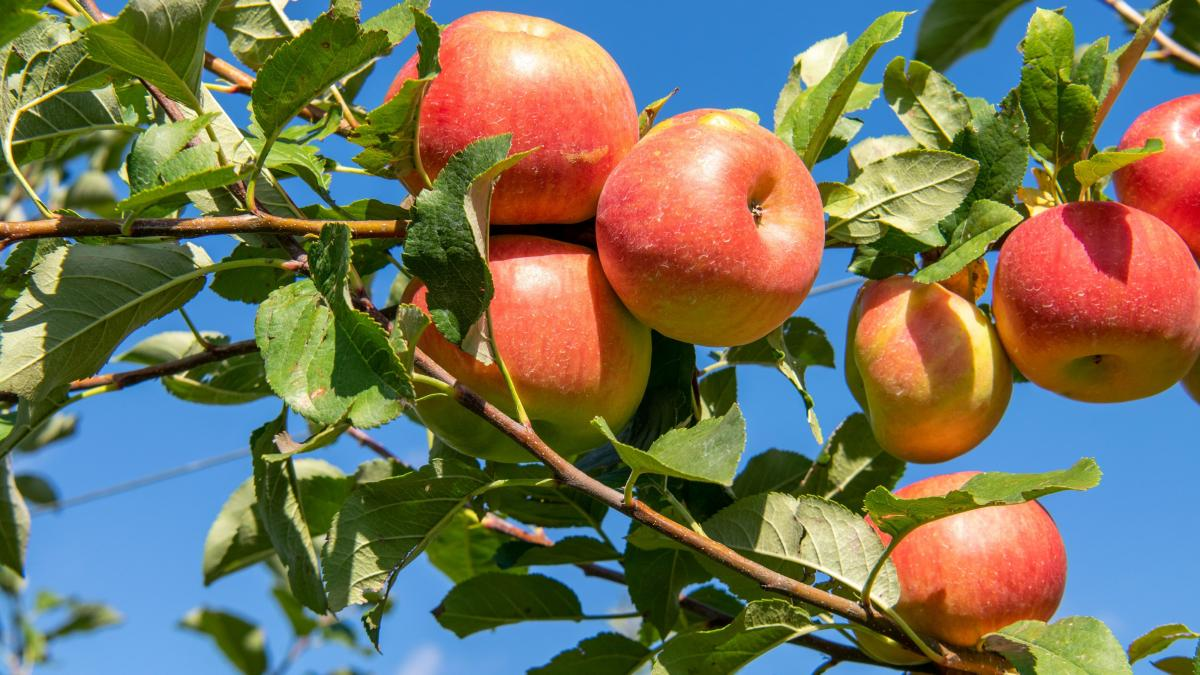

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
       Description
    </p>
</div>


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
       This dataset contains information about different types of fruits, including their size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality. It appears to be a dataset used for analyzing the quality of various fruits.
    </p>
</div>


Columns :
* index: The index of the dataframe.
* A_id: The ID of the item.
* Size: The size of the item in some unit of measurement.
* Weight: The weight of the item in some unit of measurement.
* Sweetness: The level of sweetness of the item on a scale from very sweet to very sour.
* Crunchiness: The level of crunchiness of the item on a scale from very soft to very crunchy.
* Juiciness: The level of juiciness of the item on a scale from very dry to very juicy.
* Ripeness: The level of ripeness of the item on a scale from unripe to overripe.
* Acidity: The level of acidity of the item on a scale from very low to very high.
* Quality: The overall quality rating of the item, either "good" or "bad".

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      1. Import Libraries
    </p>
</div>


In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from scipy import stats
from colorama import Fore, init
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.model_selection import learning_curve


import warnings
warnings.filterwarnings ('ignore')

sns.set(style="whitegrid")


<div style="background-color:#BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      2. Import Data
    </p>
</div>


In [2]:
df = pd.read_csv("/kaggle/input/apple-quality/apple_quality.csv")

In [3]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


<Axes: >

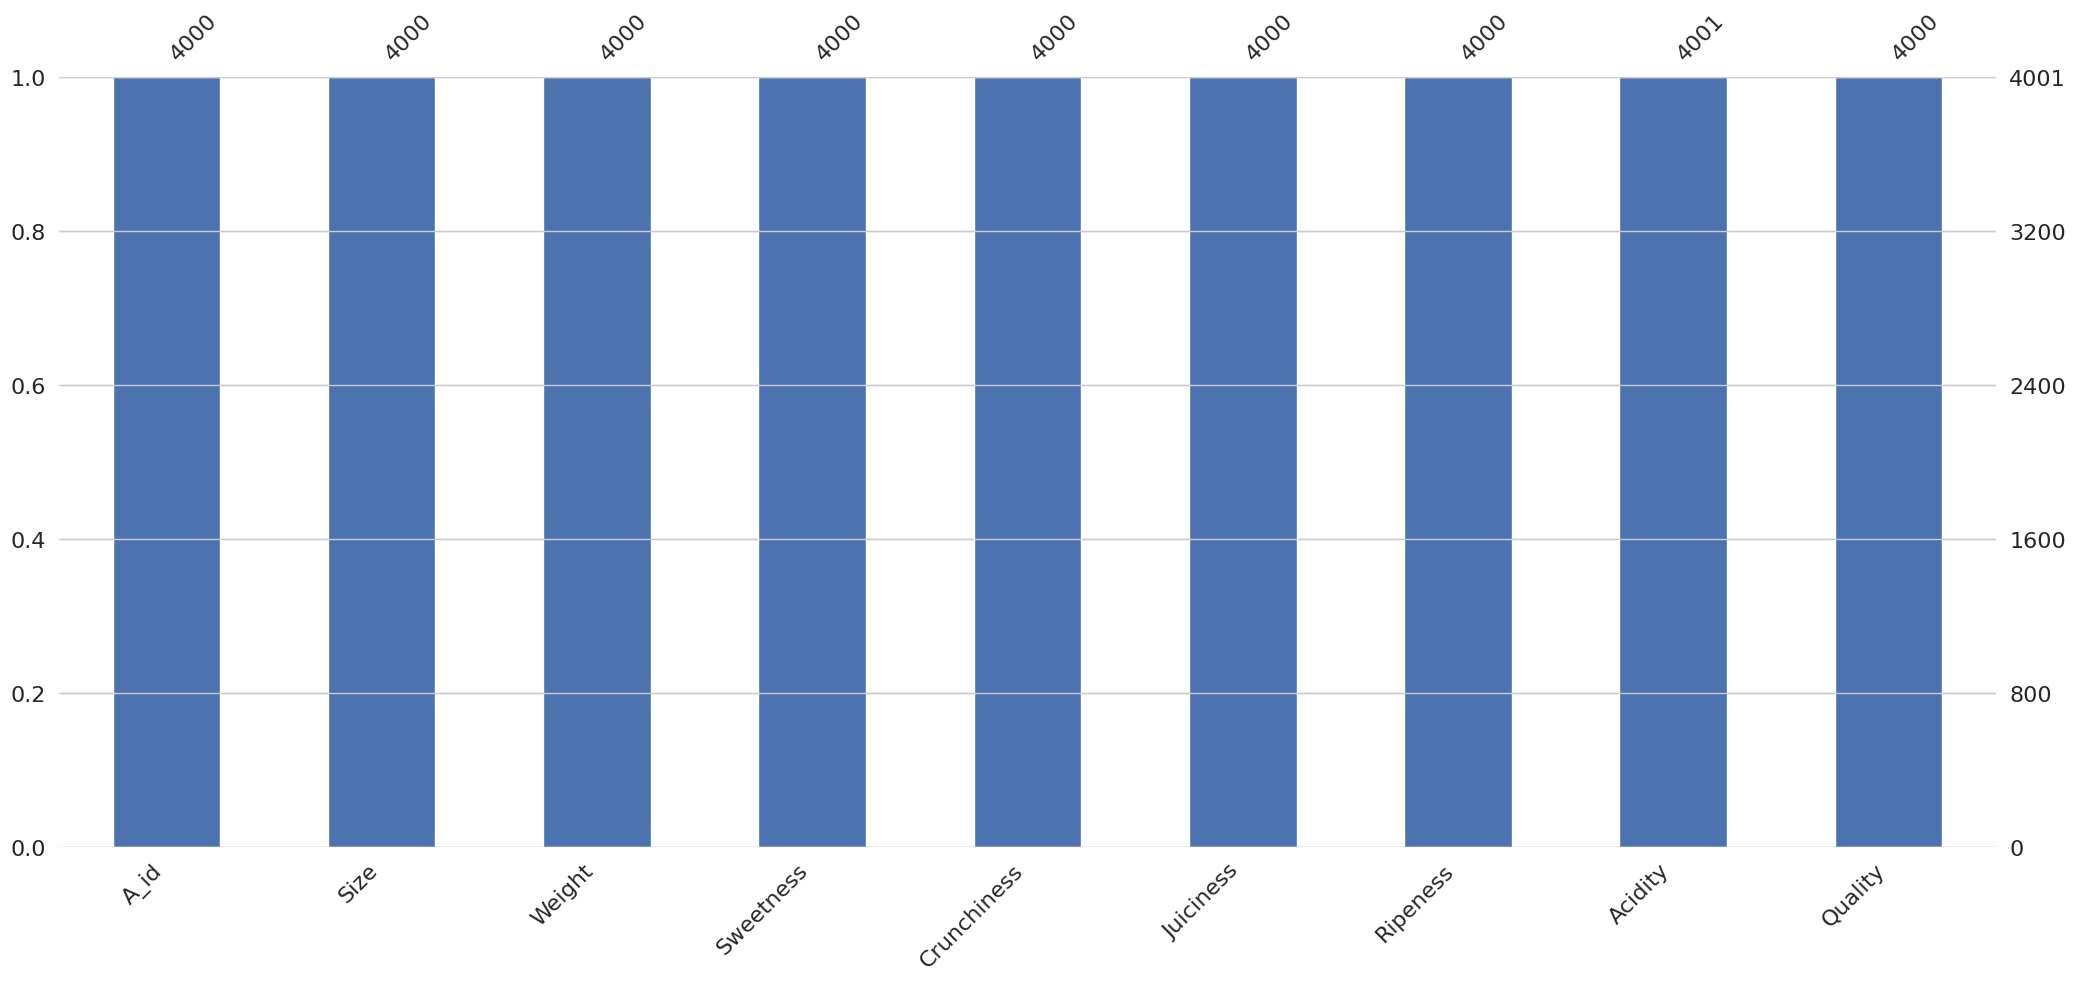

In [5]:
msno.bar(df, color = 'b')

In [6]:
df.describe().T.style.background_gradient(axis=0, cmap='cubehelix')

,count,mean,std,min,25%,50%,75%,max
A_id,4000.000000,1999.500000,1154.844867,0.000000,999.750000,1999.500000,2999.250000,3999.000000
Size,4000.000000,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.000000,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.000000,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.000000,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.000000,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.000000,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837


In [7]:
df.duplicated().sum()

0

In [8]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

A_id: 4001 distinct values
Size: 4001 distinct values
Weight: 4001 distinct values
Sweetness: 4001 distinct values
Crunchiness: 4001 distinct values
Juiciness: 4001 distinct values
Ripeness: 4001 distinct values
Acidity: 4001 distinct values
Quality: 3 distinct values


In [9]:
df.duplicated().sum()

0

In [10]:
df[df.isnull().any(axis = 1)]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3. Exploration Data
    </p>
</div>


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3.1  Clean Data
    </p>
</div>


In [11]:
def clean_data(df):
    
    df = df.drop(columns=['A_id'])
    
    df = df.dropna()
    
    df = df.astype({'Acidity': 'float64'})
    
    def label(Quality):
        """
        Transform based on the following examples:
        Quality    Output
        "good"  => 0
        "bad"   => 1
        """
        if Quality == "good":
            return 0
    
        if Quality == "bad":
            return 1
    
        return None
    
    df['Label'] = df['Quality'].apply(label)
    
    df = df.drop(columns=['Quality'])
    
    df = df.astype({'Label': 'int64'})
    
    return df

df_clean = clean_data(df.copy())
df_clean.head()


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Label
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,0
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,0
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,0


In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Label        4000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 281.2 KB


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3.2  Visualization
    </p>
</div>


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3.2.1  Univariate 
    </p>
</div>


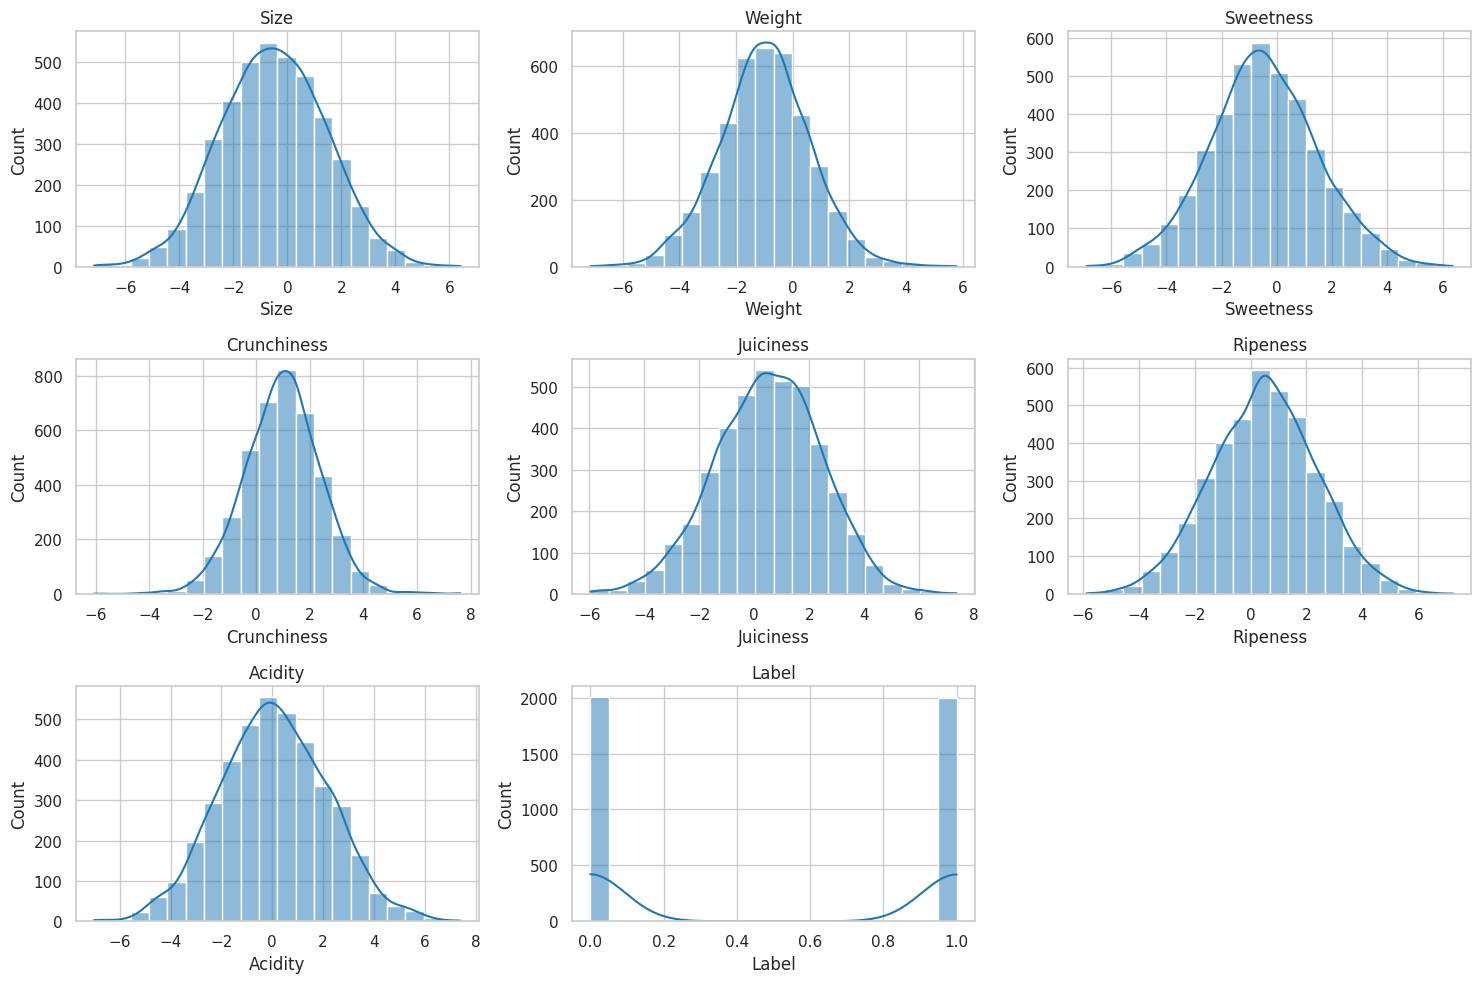

In [13]:
numerical_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Label']

plt.figure(figsize=(15, 10))
sns.set_palette("tab10")

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_clean, x=column, kde=True, bins=20)  # Use sns.histplot for newer versions
    plt.title(column)

plt.tight_layout()
plt.show()


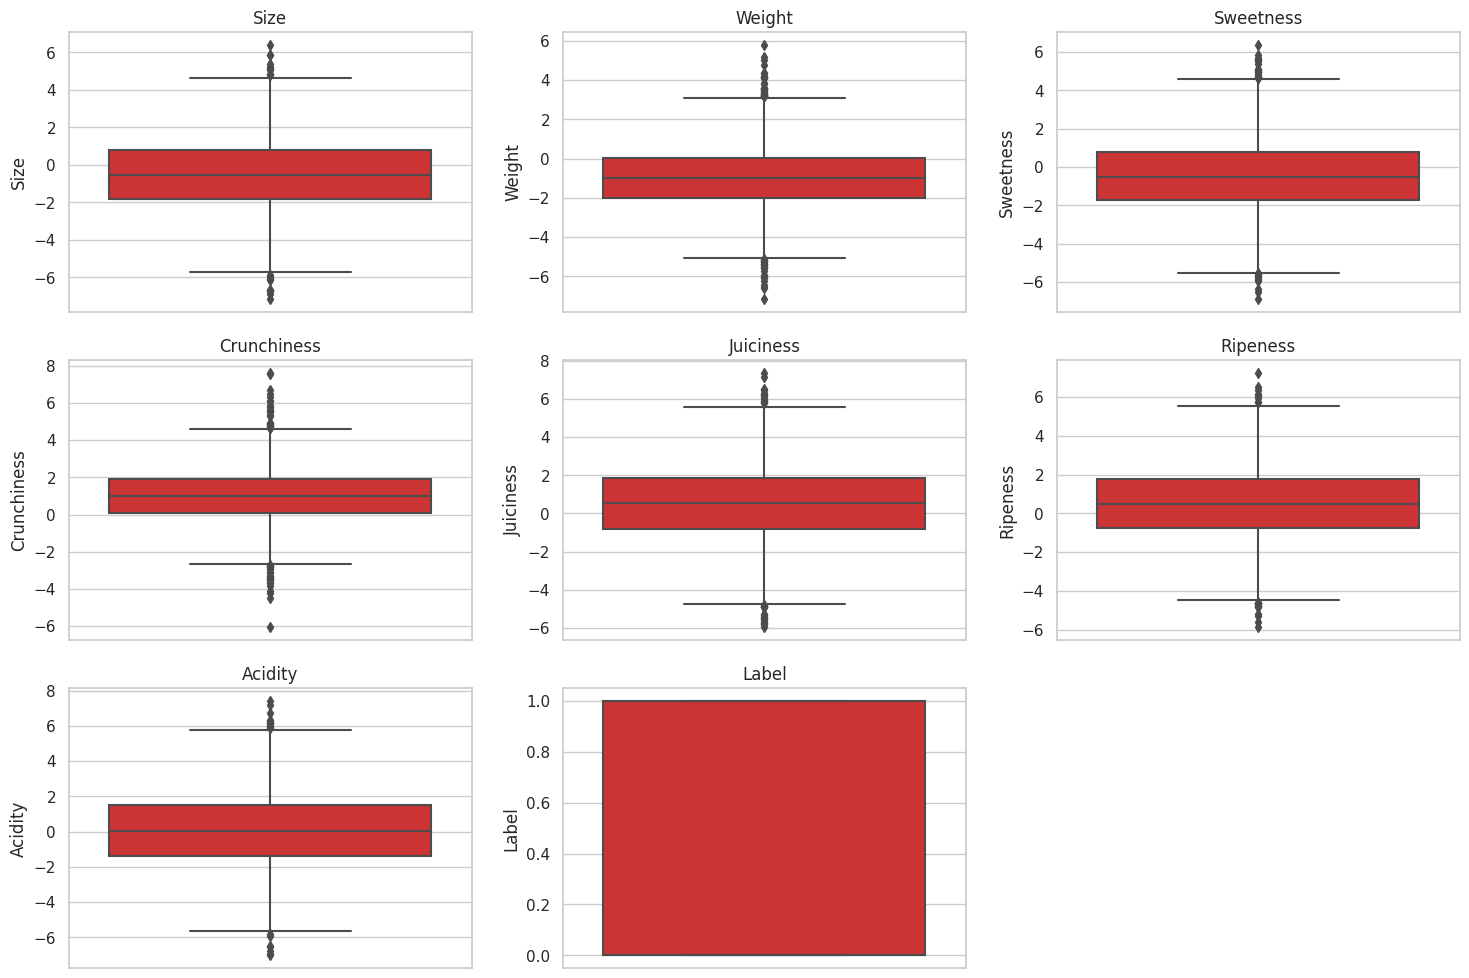

In [14]:
numerical_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity','Label']

plt.figure(figsize=(15, 10))
sns.set_palette("Set1")
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_clean[column])
    plt.title(column)

plt.tight_layout()
plt.show()


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3.2.2  Bivariate 
    </p>
</div>


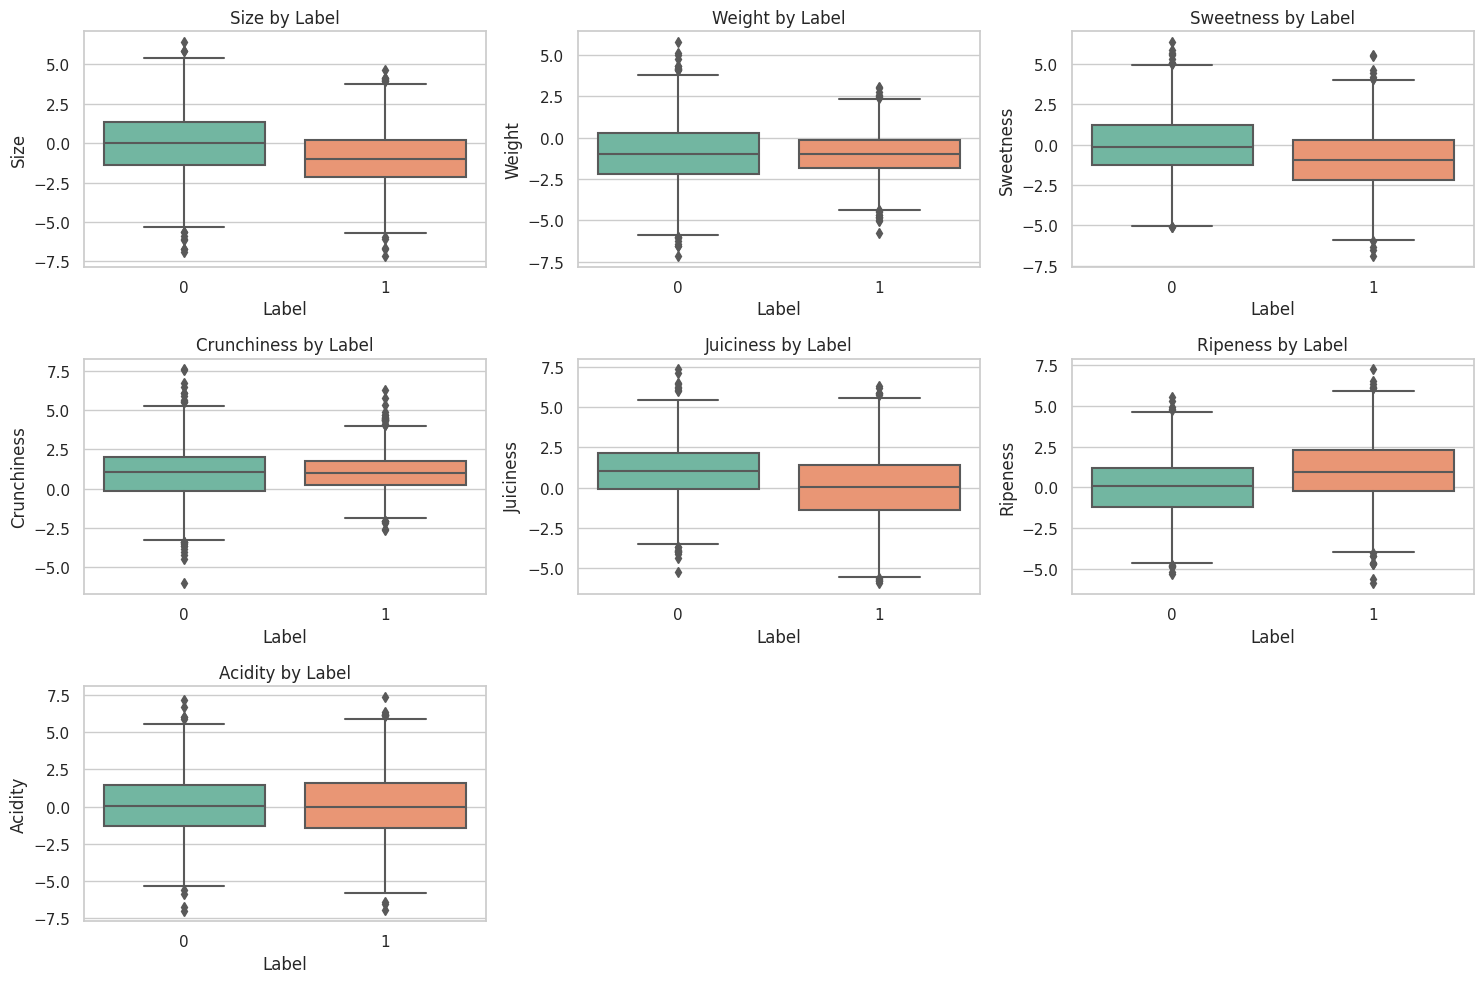

In [15]:
plt.figure(figsize=(15, 10))
sns.set_palette("Set2")

for i, column in enumerate(df_clean.columns[:-1]):  
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Label', y=column, data=df_clean)
    plt.title(f'{column} by Label')

plt.tight_layout()
plt.show()


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3.2.3  Multivariate 
    </p>
</div>


<Figure size 800x800 with 0 Axes>

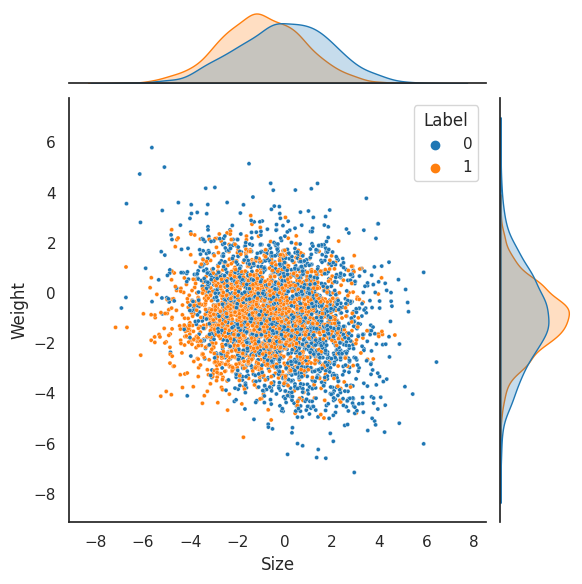

In [16]:
plt.figure(figsize=(8, 8))
sns.set(style="white")  

sns.jointplot(x='Size', y='Weight', hue='Label', data=df_clean, palette='tab10', s=9)

<Figure size 800x800 with 0 Axes>

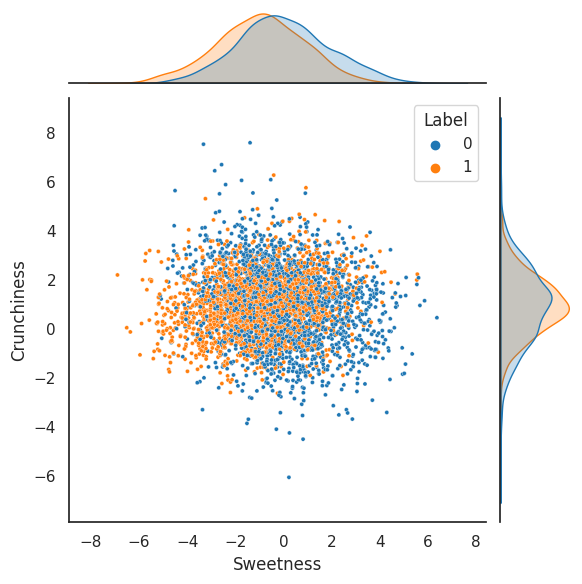

In [17]:
plt.figure(figsize=(8, 8))
sns.set(style="white")  

sns.jointplot(x='Sweetness', y='Crunchiness', hue='Label', data=df_clean, palette='tab10', s=9)

<Figure size 800x800 with 0 Axes>

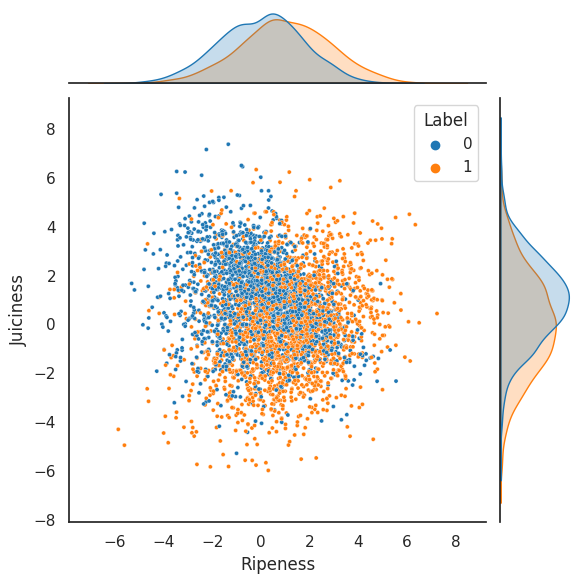

In [18]:
plt.figure(figsize=(8, 8))
sns.set(style="white")  

sns.jointplot(x='Ripeness', y='Juiciness', hue='Label', data=df_clean, palette='tab10', s=9)

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3.3  Correlation Heatmap
    </p>
</div>


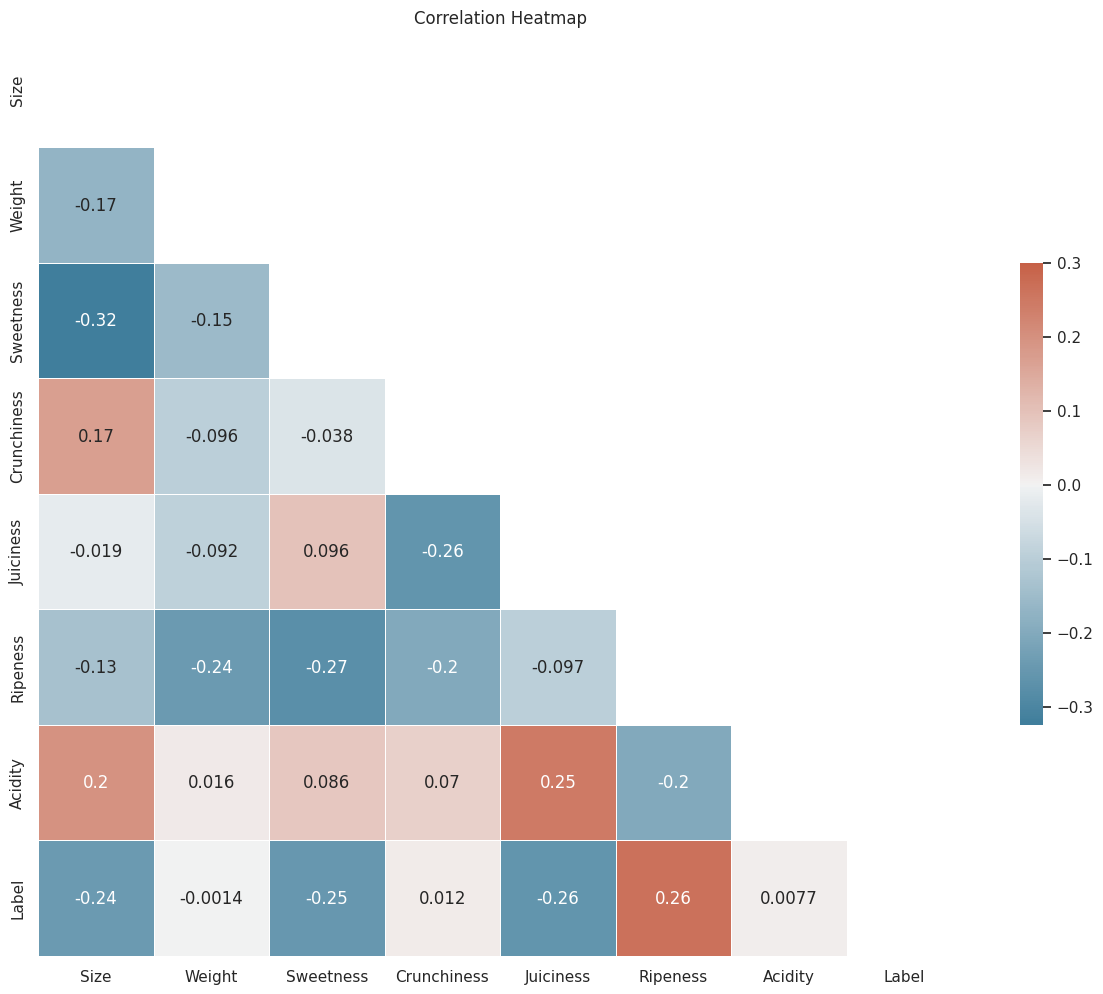

In [19]:
corr = df_clean.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 12))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      4. Preprocesing
    </p>
</div>


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      4.1  Outliers
    </p>
</div>


In [20]:
numerical_features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity']

robust_scaler = RobustScaler()

df_clean[numerical_features] = robust_scaler.fit_transform(df_clean[numerical_features])

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

for feature in numerical_features :
    num_outliers = count_outliers(df_clean[feature])
    print(f'Number of outliers in {feature}: {num_outliers}')

Number of outliers in Size: 22
Number of outliers in Weight: 54
Number of outliers in Sweetness: 32
Number of outliers in Crunchiness: 47
Number of outliers in Juiciness: 32
Number of outliers in Ripeness: 24
Number of outliers in Acidity: 20


In [21]:
scaler = StandardScaler()

df_clean[numerical_features] = scaler.fit_transform(df_clean[numerical_features])

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      4.2  Hypothesis Testing
    </p>
</div>


Hypothesis testing is a statistical method used to make decisions based on sample data regarding a proposed claim or hypothesis about a population. In this process, we examine whether the evidence found from the sample is sufficiently strong to support or contradict a statement about a population parameter.

T-statistic: 6.950226687826504e-16
P-value: 0.9999999999999994


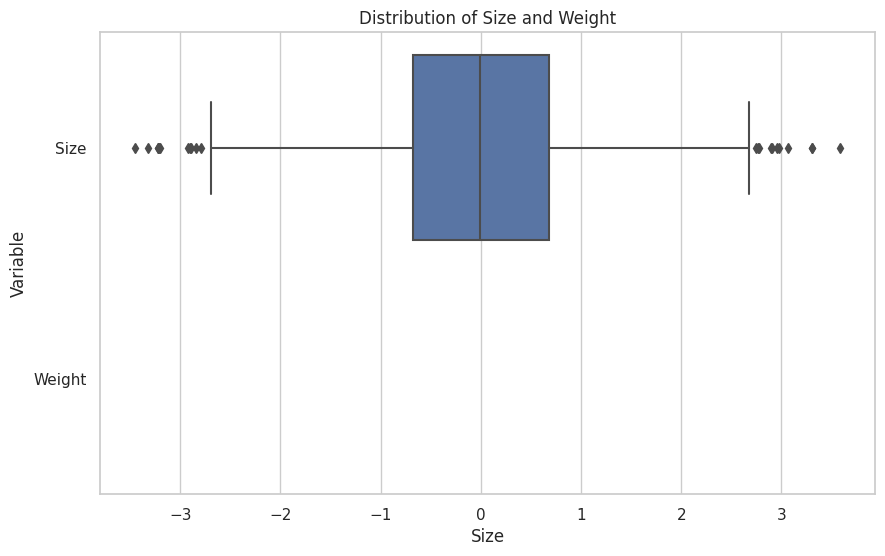

T-statistic: -3.971558107329431e-16
P-value: 0.9999999999999997


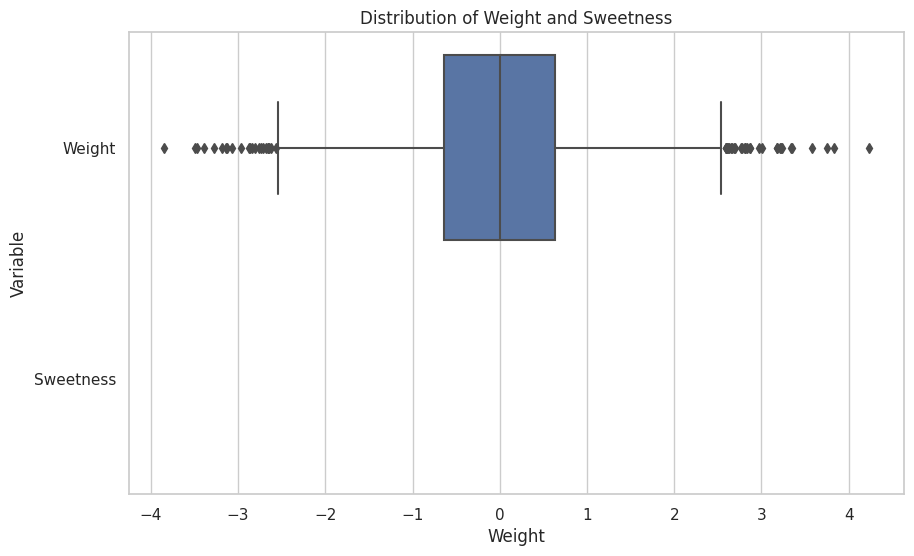

T-statistic: 9.730317362957104e-16
P-value: 0.9999999999999992


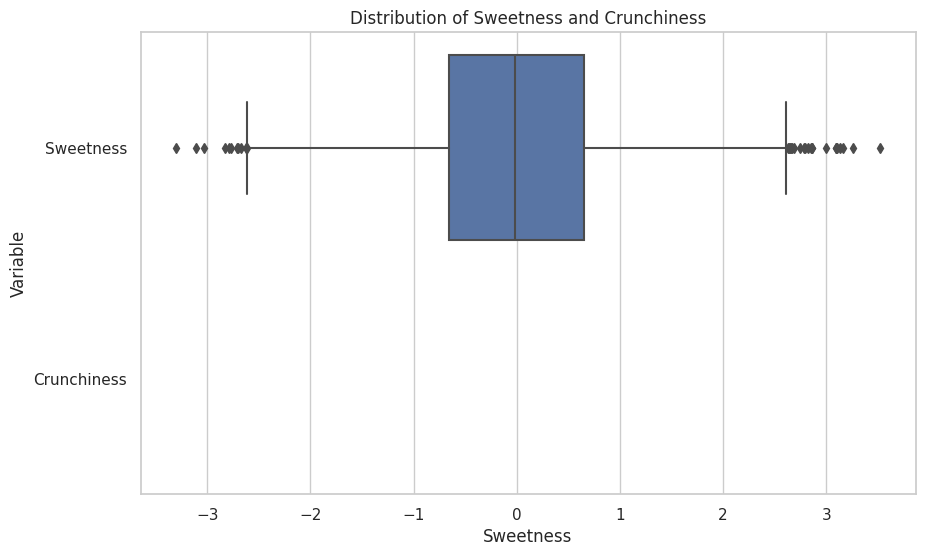

T-statistic: -1.707769986151655e-15
P-value: 0.9999999999999987


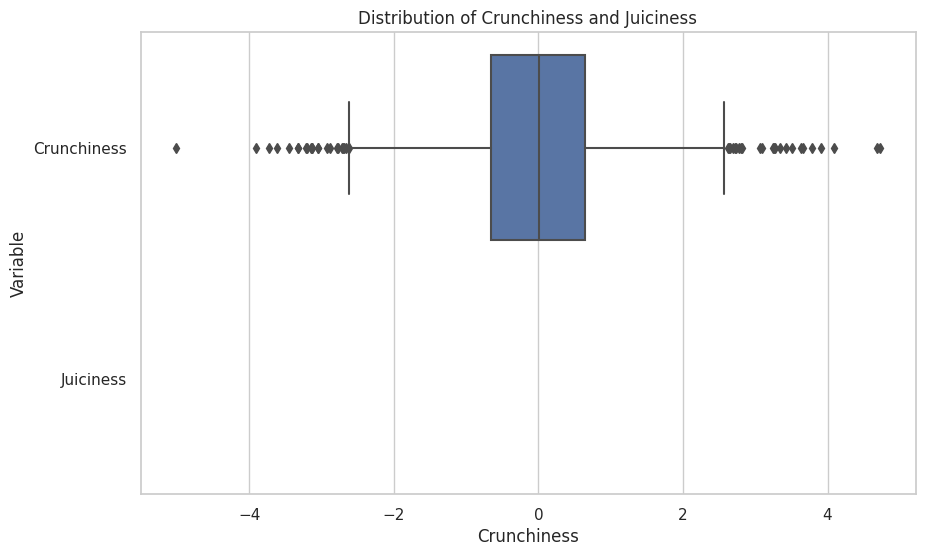

T-statistic: 1.707769986151655e-15
P-value: 0.9999999999999987


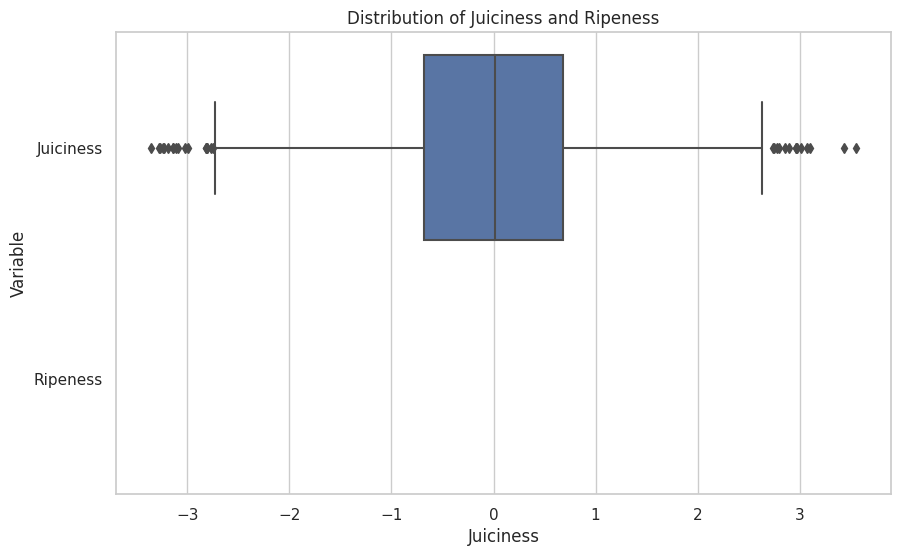

T-statistic: -1.5886232429317723e-16
P-value: 0.9999999999999999


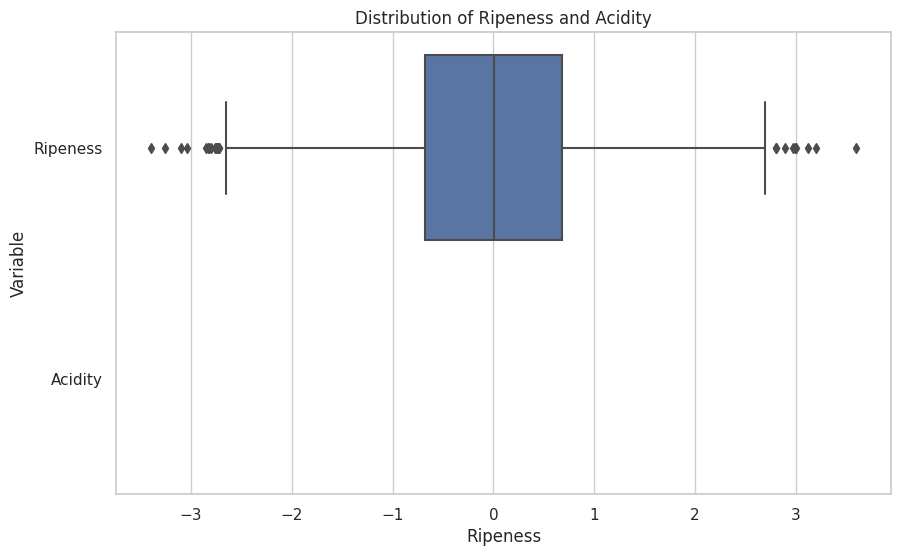

In [22]:
sns.set(style="whitegrid")


def hypothesis_testing(df, column1, column2):
    t_stat, p_val = stats.ttest_ind(df[column1], df[column2])
    
    print("T-statistic:", t_stat)
    print("P-value:", p_val)
    
   
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column1], y="Variable", data=pd.melt(df[[column1, column2]], var_name="Variable"))
    plt.title(f'Distribution of {column1} and {column2}')
    plt.show()

columns_for_testing = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

for i in range(len(columns_for_testing) - 1):
    hypothesis_testing(df_clean, columns_for_testing[i], columns_for_testing[i + 1])


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      4.3  Imbalance Data
    </p>
</div>


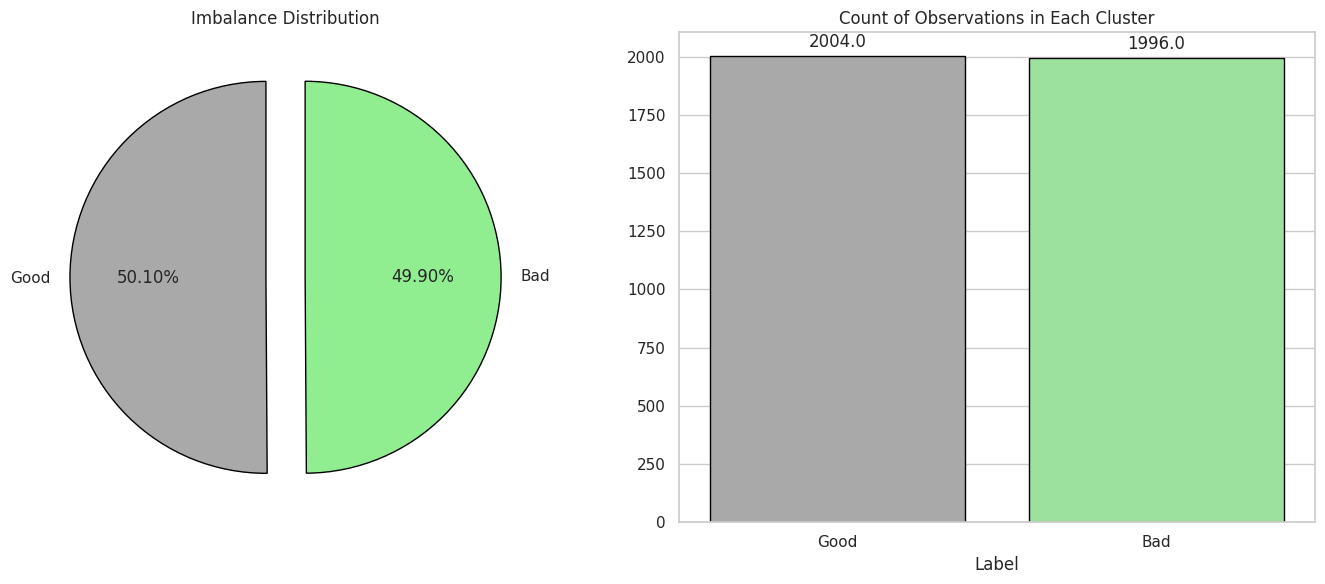

In [23]:
good_count = df_clean['Label'].eq(0).sum()
bad_count = df_clean['Label'].eq(1).sum()
total_count = len(df_clean)

good_percentage = (good_count / total_count) * 100
bad_percentage = (bad_count / total_count) * 100

label_counts = df_clean['Label'].value_counts()

plt.figure(figsize=(14, 6))

# Subplot 1 - Pie Chart
plt.subplot(1, 2, 1)
pie_values = [good_percentage, bad_percentage]
colors = ['darkgrey', 'lightgreen']
plt.pie(pie_values, labels=['Good', 'Bad'],
        autopct='%1.2f%%',
        startangle=90,
        explode=(0.1, 0.1),
        colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Imbalance Distribution')

# Subplot 2 - Bar Chart
plt.subplot(1, 2, 2)
colors = ['darkgrey', 'lightgreen']
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette=colors, edgecolor='black')
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_xticks([0, 1])  
ax.set_xticklabels(['Good', 'Bad'])
plt.title('Count of Observations in Each Cluster')

plt.tight_layout()
plt.show()


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      4.4  Normalization 
    </p>
</div>


In [24]:
df1 = df_clean.copy()

In [25]:
X = df1.drop(['Label'], axis=1)
y = df1['Label']


In [26]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [27]:
X_resampled.describe().T.style.background_gradient(axis=0, cmap='viridis')

,count,mean,std,min,25%,50%,75%,max
Size,4008.000000,0.490431,0.142145,0.000000,0.393548,0.489598,0.586959,1.000000
Weight,4008.000000,0.476027,0.123774,0.000000,0.397052,0.476383,0.554808,1.000000
Sweetness,4008.000000,0.483921,0.146609,0.000000,0.388526,0.481469,0.579613,1.000000
Crunchiness,4008.000000,0.514861,0.102545,0.000000,0.447492,0.515914,0.581305,1.000000
Juiciness,4008.000000,0.485754,0.144913,0.000000,0.387234,0.487180,0.585042,1.000000
Ripeness,4008.000000,0.485673,0.143085,0.000000,0.388877,0.486020,0.582625,1.000000
Acidity,4008.000000,0.491819,0.146420,0.000000,0.390824,0.487914,0.591137,1.000000


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      4.5 Split Data 
    </p>
</div>


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

 <div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      4.6 PCA on Training and Test Data 
    </p>
</div>


In [29]:
X_combined = np.vstack([X_train, X_test])

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_combined)

In [30]:
X_train_pca = principal_components[:len(X_train)]
X_test_pca = principal_components[len(X_train):]

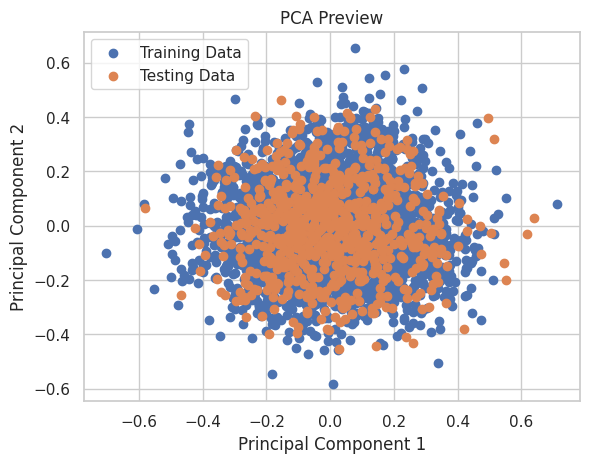

In [31]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], label='Training Data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], label='Testing Data')
plt.title('PCA Preview')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      5. Modeling 
    </p>
</div>


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      5.1 SVC 
    </p>
</div>


In [33]:
param_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

svc = SVC()

randomized_search = RandomizedSearchCV(svc, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

randomized_search.fit(X_train, y_train)

best_params = randomized_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_svc_model = randomized_search.best_estimator_
svc_predicted = best_svc_model.predict(X_test)

svc_acc_score = accuracy_score(y_test, svc_predicted)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)

print("\nConfusion Matrix:")
print(svc_conf_matrix)
print("\nAccuracy of Support Vector Classifier:", svc_acc_score * 100, '\n')
print("Classification Report:")
print(classification_report(y_test, svc_predicted))



Best Hyperparameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}

Confusion Matrix:
[[373  39]
 [ 29 361]]

Accuracy of Support Vector Classifier: 91.52119700748129 

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       412
           1       0.90      0.93      0.91       390

    accuracy                           0.92       802
   macro avg       0.92      0.92      0.92       802
weighted avg       0.92      0.92      0.92       802



<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      5.2 Random Forest Classifier
    </p>
</div>


In [34]:
param_dist_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}

rf = RandomForestClassifier()

randomized_search_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

randomized_search_rf.fit(X_train, y_train)

best_params_rf = randomized_search_rf.best_params_
print(f"Best Hyperparameters for Random Forest: {best_params_rf}")

best_rf_model = randomized_search_rf.best_estimator_

rf_predicted = best_rf_model.predict(X_test)

rf_acc_score = accuracy_score(y_test, rf_predicted)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)

print("\nConfusion Matrix for Random Forest:")
print(rf_conf_matrix)
print("\nAccuracy of Random Forest Classifier:", rf_acc_score * 100, '\n')
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_predicted))


Best Hyperparameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': True}

Confusion Matrix for Random Forest:
[[364  48]
 [ 42 348]]

Accuracy of Random Forest Classifier: 88.7780548628429 

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       412
           1       0.88      0.89      0.89       390

    accuracy                           0.89       802
   macro avg       0.89      0.89      0.89       802
weighted avg       0.89      0.89      0.89       802



<div style="background-color:#BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      5.3  KNeighbors Classifier 
    </p>
</div>


In [35]:
param_dist_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40],
    'p': [1, 2],
}

knn = KNeighborsClassifier()

randomized_search_knn = RandomizedSearchCV(
    knn,
    param_distributions=param_dist_knn,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

randomized_search_knn.fit(X_train, y_train)

best_params_knn = randomized_search_knn.best_params_
print(f"Best Hyperparameters for KNeighborsClassifier: {best_params_knn}")

best_knn_model = randomized_search_knn.best_estimator_

knn_predicted = best_knn_model.predict(X_test)

knn_acc_score = accuracy_score(y_test, knn_predicted)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)

print("\nConfusion Matrix for KNeighborsClassifier:")
print(knn_conf_matrix)
print("\nAccuracy of KNeighborsClassifier:", knn_acc_score * 100, '\n')
print("Classification Report for KNeighborsClassifier:")
print(classification_report(y_test, knn_predicted))


Best Hyperparameters for KNeighborsClassifier: {'weights': 'distance', 'p': 2, 'n_neighbors': 5, 'leaf_size': 30, 'algorithm': 'kd_tree'}

Confusion Matrix for KNeighborsClassifier:
[[365  47]
 [ 42 348]]

Accuracy of KNeighborsClassifier: 88.90274314214463 

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       412
           1       0.88      0.89      0.89       390

    accuracy                           0.89       802
   macro avg       0.89      0.89      0.89       802
weighted avg       0.89      0.89      0.89       802



<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      The Best Model is SVC
    </p>
</div>


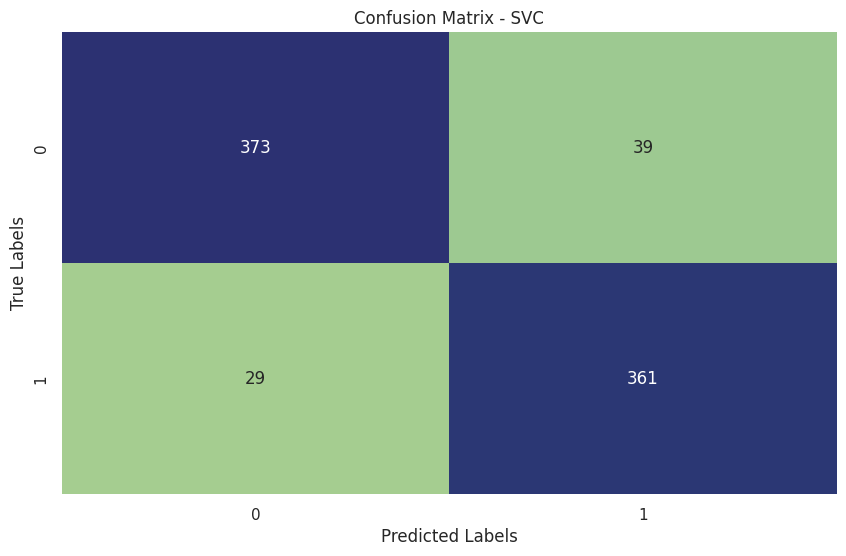


Accuracy of Support Vector Classifier: 91.52119700748129 



In [36]:
conf_matrix = confusion_matrix(y_test, svc_predicted)

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest', cbar=False)
plt.title('Confusion Matrix - SVC')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("\nAccuracy of Support Vector Classifier:", svc_acc_score * 100, '\n')

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      5.6.Receiver Operator Characteristic (ROC)
    </p>
</div>


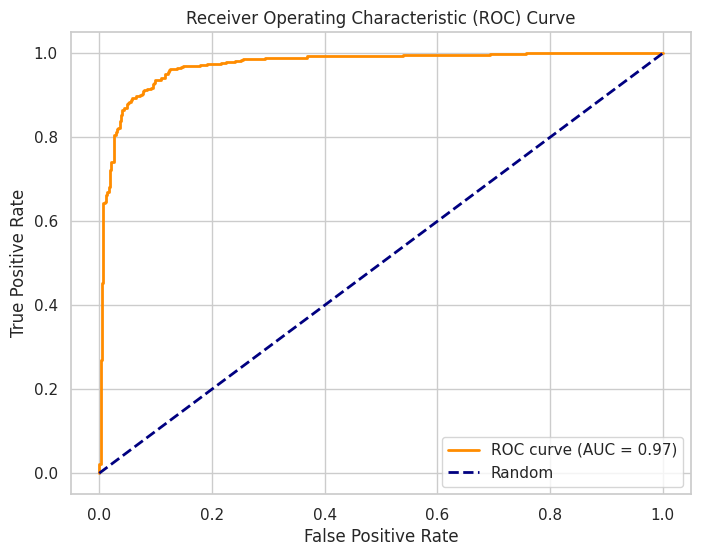

In [37]:
y_prob = best_svc_model.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

* 0.90 - 1.00 = ****excellent**** *
* 0.80 - 0.90 = ****good****
* 0.70 - 0.80 = ****fair****
* 0.60 - 0.70 = ****poor****
* 0.50 - 0.60 = ****fail****

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      5.7.Cross Validation
    </p>
</div>


In [38]:
cross_val_scores = cross_val_score(best_svc_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

print("\nCross-validation Scores:")
print(cross_val_scores)

average_cv_score = cross_val_scores.mean()
print("\nAverage Cross-validation Score:", average_cv_score * 100)

std_cv_score = cross_val_scores.std()
print("Standard Deviation of Cross-validation Scores:", std_cv_score * 100)



Cross-validation Scores:
[0.90031153 0.89859594 0.92043682 0.90483619 0.90639626]

Average Cross-validation Score: 90.6115347417635
Standard Deviation of Cross-validation Scores: 0.7707728804783651


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      5.8.Learning Curve
    </p>
</div>


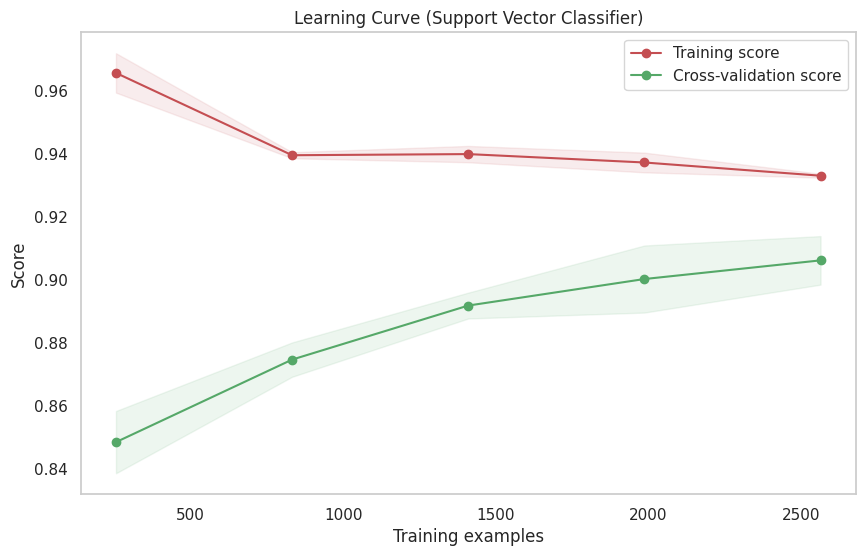

In [39]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curve (Support Vector Classifier)"
plot_learning_curve(best_svc_model, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()
